## Mathematics of Machine Learning

### Chapter 3: Linear classification methods
### Section 3.3: Hard SVM Rule

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

#### (0) Data Preparation

Generate the training data

In [2]:
# Seed - a starting point in generating random numbers
np.random.seed(17)

In [3]:
# Size of the dataset
m = 25

In [4]:
x = np.random.uniform(low=-3, high=3, size=(2, m))
print(x)

[[-1.23200998  0.18352053 -1.85087528 -2.59259785  1.72191276  0.93800113
   0.82512538  0.45361736 -2.7656225  -0.85311837  2.67409912 -2.63973192
   2.18425262  2.26374316 -2.69283801  0.91451169  0.31050821  0.58507952
  -0.09882825 -1.30207103 -1.21364569  0.36905343 -0.62371538  1.73220426
  -0.48909369]
 [-2.13657648 -2.09455983 -2.6685519   1.30822316 -1.24609587 -1.80735677
   1.98818353  0.40794672 -2.5059615   0.26999144 -2.04624753  1.06057431
  -2.28916641 -0.3300236   2.3278946   1.78360638 -2.59212763  2.76472654
   0.95523235  1.3126565   1.46146059  2.32641811 -2.19632599  1.66184748
   2.02794907]]


In [5]:
# true parameters
w_true = np.array([[1], [2]])
print(w_true)

[[1]
 [2]]


In [6]:
# True markers
y = np.sign(np.dot(w_true.T, x)) + (np.dot(w_true.T, x) == 0)
print(y)

[[-1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.
   1.  1.  1.  1. -1.  1.  1.]]


In [7]:
# Margin distance of the true hypothesis
gamma_true = 1/np.linalg.norm(w_true) * np.amin(abs(np.dot(w_true.T, x)))
print(gamma_true)

0.01066536162203887


#### (1) Hard SVM Rule

In [8]:
# Determine the solution
def fun(w): return np.linalg.norm(w)**2

In [9]:
# Determine the linear constraints
A = np.tile(y, (2, 1)) * x


def constraint(w):
    return np.ravel(-np.ones((m, 1)) - np.dot(-A.T, w))


con = {'type': 'ineq', 'fun': constraint}

In [10]:
# The minimize function provides algorithms for constrained minimization.
result = opt.minimize(fun, np.zeros((2, 1)), constraints=con, options={'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: 82.96452759795285
            Iterations: 8
            Function evaluations: 14
            Gradient evaluations: 4


In [23]:
fw = result.fun
w = result.x
w = np.array([[i] for i in w])
print(w)
print(fw)

[[3.79296463]
 [8.28118029]]
82.96452759795285


In [12]:
# Maximum margin
gamma = 1/np.sqrt(fw)
print(gamma)

0.10978772294412567


We plot the permissible range and the objective function.

In [13]:
# To do this, we determine the columns of A with A[1, :] negative or positive ...
indAn = [i for (i, val) in enumerate(A[1, :]) if val < 0]
indAp = [i for (i, val) in enumerate(A[1, :]) if val > 0]
print(A)
print(indAn)
print(indAp)
print(A[0, indAn])

[[ 1.23200998 -0.18352053  1.85087528 -2.59259785 -1.72191276 -0.93800113
   0.82512538  0.45361736  2.7656225   0.85311837 -2.67409912  2.63973192
  -2.18425262  2.26374316 -2.69283801  0.91451169 -0.31050821  0.58507952
  -0.09882825 -1.30207103 -1.21364569  0.36905343  0.62371538  1.73220426
  -0.48909369]
 [ 2.13657648  2.09455983  2.6685519   1.30822316  1.24609587  1.80735677
   1.98818353  0.40794672  2.5059615  -0.26999144  2.04624753 -1.06057431
   2.28916641 -0.3300236   2.3278946   1.78360638  2.59212763  2.76472654
   0.95523235  1.3126565   1.46146059  2.32641811  2.19632599  1.66184748
   2.02794907]]
[9, 11, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0.85311837 2.63973192 2.26374316]


In [14]:
# ... and build from it the lower and upper bound of the permissible range.
def a_low(w1): 
    return np.amax((1 - w1 * A[0, indAp])/np.tile(A[1, indAp], (len(w1), 1)), axis = 1)[:, None]
    
def a_up(w1):
    return np.amin((1 - w1 * A[0, indAn])/np.tile(A[1, indAn], (len(w1), 1)), axis = 1)[:, None]

In [15]:
# We discretize w1 in the corresponding range.
w1 = np.array([[i] for i in np.arange(0, 1/gamma, 0.01)])

In [16]:
# And determine the bounds for w2.
w2_low = a_low(w1)
w2_up = a_up(w1)
print(w2_low.shape)
print(w2_up.shape)

(911, 1)
(911, 1)


In [17]:
# We are looking for the "intersection" of the lower and upper boundary.
ind = min([i for (i, val) in enumerate(w2_low) if w2_low[i, :] <= w2_up[i, :]])
print(ind)

380


In [18]:
# Plot the height lines of the objective function.
# Discretization of the w-values per axis
w1s = np.array([[i] for i in np.arange(0, np.amax(w1) + np.amax(w1)/500, np.amax(w1)/500)]) 
w2s = np.array([[i] for i in np.arange(0, np.amax(w2_up) + np.amax(w2_up)/500, np.amax(w2_up)/500)])
print(w2s.shape)

(501, 1)


In [19]:
# Generate discretization grid
WW1, WW2 = np.meshgrid(w1s, w2s)

In [20]:
# Evaluate RS on the grid points
F_Ws = (np.ravel(WW1, order='F')**2 + np.ravel(WW2, order='F')**2)[:, None]
print(F_Ws.shape)

(251001, 1)


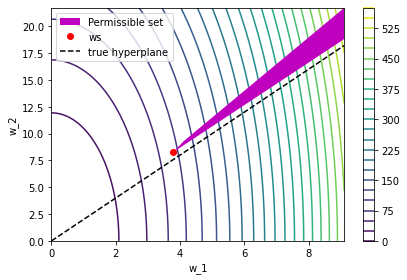

In [21]:
# Generate graphic (contour plot)
fig, ax = plt.subplots()

CS = ax.contour(WW1, WW2, np.reshape(F_Ws, (len(w1s), len(w2s))), 25, zorder=1)
fig.colorbar(CS)

# Plot the permissible set
ax.fill(np.concatenate((w1[ind:], w1[:(ind-1):-1]), axis = 0), np.concatenate((w2_low[ind:], w2_up[:(ind-1):-1]), axis = 0), 'm', label='Permissible set', zorder=2)

# Plot the solution of the hard SVM rule and the true parameter
ax.plot(w[0], w[1], 'or', label='ws')
ax.plot(w1, w_true[1]/w_true[0]*w1, '--k', label='true hyperplane')

ax.legend()
plt.xlim([0, 1/gamma])
plt.ylim([0, max(w2_up)])
plt.xlabel('w_1')
plt.ylabel('w_2')

plt.tight_layout()
plt.show()

#### (2) Plot the training data

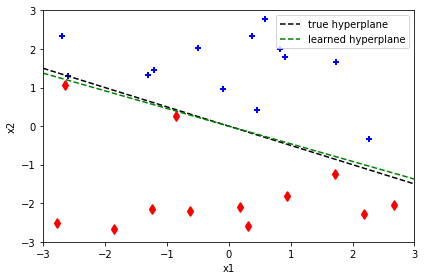

In [22]:
fig, ax = plt.subplots()

# First plot the true hyperplane for x in [-3,3]
ax.plot([-3,3], -w_true[0]/w_true[1]*[-3,3], "--k", label="true hyperplane")

# Plot the learned hypothesis
ax.plot([-3,3], -w[0]/w[1]*[-3,3], "--", c="g", label="learned hyperplane")

# Then enter the classified points
inds = [i for (i, val) in enumerate(y[0]) if val == 1]
indm = [i for (i, val) in enumerate(y[0]) if val == -1]

ax.scatter(x[0][inds], x[1][inds], c="b", marker="+", linewidths = 2)
ax.scatter(x[0][indm], x[1][indm], c="r", marker="d", linewidths = 2)

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

ax.set(xlim=(-3, 3), ylim=(-3, 3))
fig.tight_layout()